# Data Collection

Importing the dependencies

In [70]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Importing the dataset

url="https://raw.githubusercontent.com/Thrinith/Heart_Disease_Prediction/main/heart_disease_uci.csv"
df=pd.read_csv(url)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data Preprocessing

Data Cleaning

In [72]:
# Checking for null values

df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [73]:
#Handling null values

df.dropna(inplace = True)
from sklearn.utils import shuffle
data = shuffle(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


Feature Engineering

In [74]:
# There are some features with catgorical values.
# So we have to do label encoding for them.
# Also the original dataset contains the target as 0, 1, 2, 3, 4.
# But for identifying simply the presence of disease, we will take binary classification.
# With that view in mind, we will covert all the target features in the num column into 1/0.

In [75]:
# In some of the features, there is space which will create problem later on.
# So first we rename those attributes to handle problems in the future.

data["restecg"].replace({"lv hypertrophy": "lv_hypertrophy","st-t abnormality": "stt_abnormality" }, inplace=True)
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)

df = data[['age','sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
df['target'] = ((data['num'] > 0)*1).copy()
df['sex'] = (data['sex'] == 'Male')*1
df['fbs'] = (data['fbs'])*1
df['exang'] = (data['exang'])*1

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic_results',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
df.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
142,52,1,atypical_angina,128.0,205.0,1,normal,184.0,0,0.0,upsloping,0.0,normal,0
48,65,0,non-anginal,140.0,417.0,1,lv_hypertrophy,157.0,0,0.8,upsloping,1.0,normal,0
86,47,1,non-anginal,138.0,257.0,0,lv_hypertrophy,156.0,0,0.0,upsloping,0.0,normal,0
204,43,1,asymptomatic,110.0,211.0,0,normal,161.0,0,0.0,upsloping,0.0,reversable_defect,0
227,67,0,non-anginal,152.0,277.0,0,normal,172.0,0,0.0,upsloping,1.0,normal,0
248,52,1,asymptomatic,125.0,212.0,0,normal,168.0,0,1.0,upsloping,2.0,reversable_defect,1
294,63,0,asymptomatic,124.0,197.0,0,normal,136.0,1,0.0,flat,0.0,normal,1
174,64,1,asymptomatic,145.0,212.0,0,lv_hypertrophy,132.0,0,2.0,flat,2.0,fixed_defect,1
115,41,1,atypical_angina,135.0,203.0,0,normal,132.0,0,0.0,flat,0.0,fixed_defect,0
282,55,0,asymptomatic,128.0,205.0,0,stt_abnormality,130.0,1,2.0,flat,1.0,reversable_defect,1


Label encoding for categorical variables

In [76]:
df['chest_pain_type'].value_counts()

asymptomatic       144
non-anginal         83
atypical_angina     49
typical_angina      23
Name: chest_pain_type, dtype: int64

In [77]:
df['chest_pain_type']=df['chest_pain_type'].apply(lambda x:0 if x== 'typical_angina' else 1 if x=='asymptomatic'else 2 if x=='non-anginal'else 3)
df['chest_pain_type'].value_counts()

1    144
2     83
3     49
0     23
Name: chest_pain_type, dtype: int64

In [78]:
df['resting_electrocardiographic_results'].value_counts()

normal             149
lv_hypertrophy     146
stt_abnormality      4
Name: resting_electrocardiographic_results, dtype: int64

In [79]:
df['resting_electrocardiographic_results']=df['resting_electrocardiographic_results'].apply(lambda x:0 if x== 'lv_hypertrophy' else 1 if x=='normal'else 2)
df['resting_electrocardiographic_results'].value_counts()

1    149
0    146
2      4
Name: resting_electrocardiographic_results, dtype: int64

In [80]:
df['st_slope_type'].value_counts()

upsloping      139
flat           139
downsloping     21
Name: st_slope_type, dtype: int64

In [81]:
df['st_slope_type']=df['st_slope_type'].apply(lambda x:0 if x== 'downsloping' else 1 if x=='flat'else 2)
df['st_slope_type'].value_counts()

2    139
1    139
0     21
Name: st_slope_type, dtype: int64

In [82]:
df['thalassemia_type'].value_counts()

normal               164
reversable_defect    117
fixed_defect          18
Name: thalassemia_type, dtype: int64

In [83]:
df['thalassemia_type']=df['thalassemia_type'].apply(lambda x:0 if x== 'fixed_defect' else 1 if x=='normal'else 2)
df['thalassemia_type'].value_counts()

1    164
2    117
0     18
Name: thalassemia_type, dtype: int64

In [84]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
142,52,1,3,128.0,205.0,1,1,184.0,0,0.0,2,0.0,1,0
48,65,0,2,140.0,417.0,1,0,157.0,0,0.8,2,1.0,1,0
86,47,1,2,138.0,257.0,0,0,156.0,0,0.0,2,0.0,1,0
204,43,1,1,110.0,211.0,0,1,161.0,0,0.0,2,0.0,2,0
227,67,0,2,152.0,277.0,0,1,172.0,0,0.0,2,1.0,1,0


In [85]:
# For doing outlier treatment to the clinical features, a domain knowledge is required.
# Removing outliers in these type of features without knowing the impact will affect the accuracy of the model.
# First we will figure out the features which contain outliers.

chest_pain_type


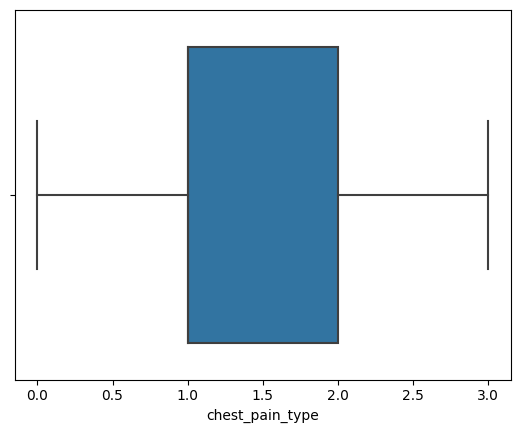

resting_blood_pressure


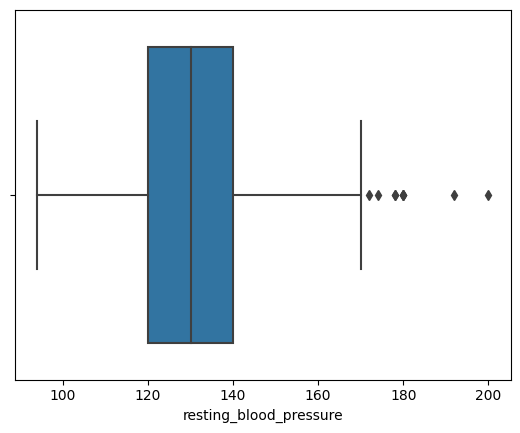

cholesterol


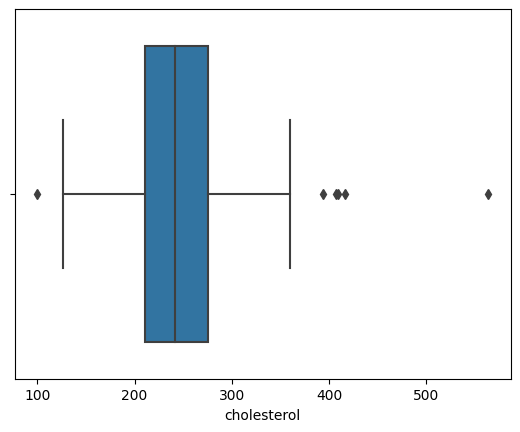

fasting_blood_sugar


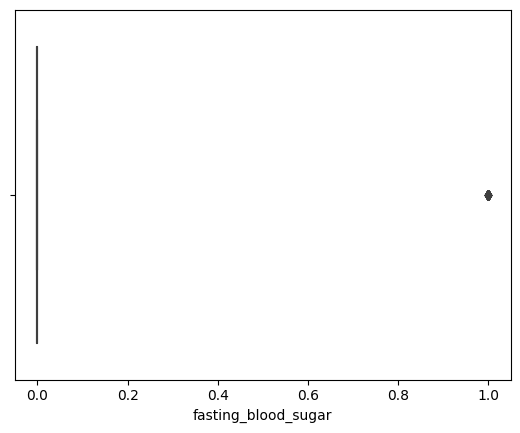

resting_electrocardiographic_results


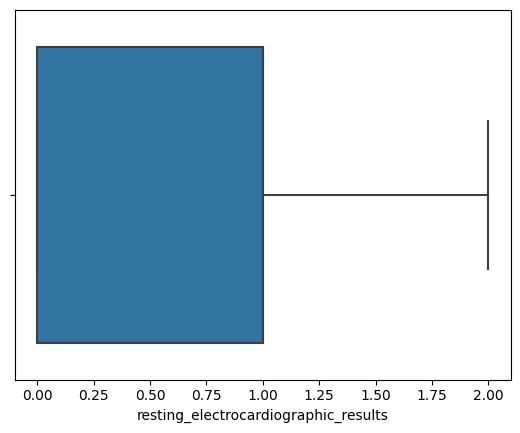

max_heart_rate_achieved


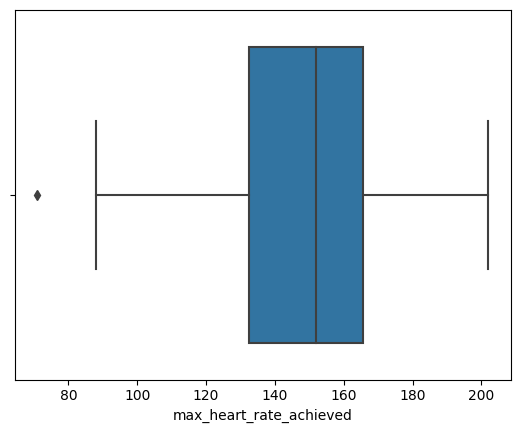

exercise_induced_angina


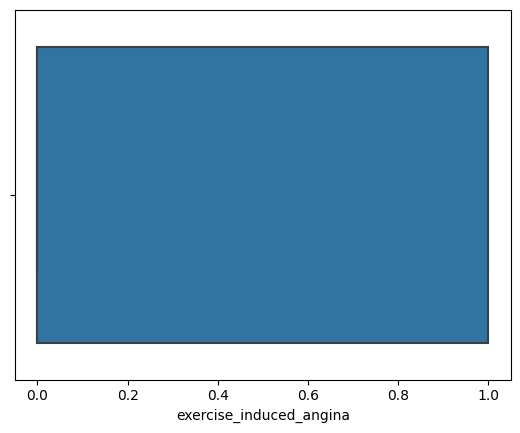

st_depression


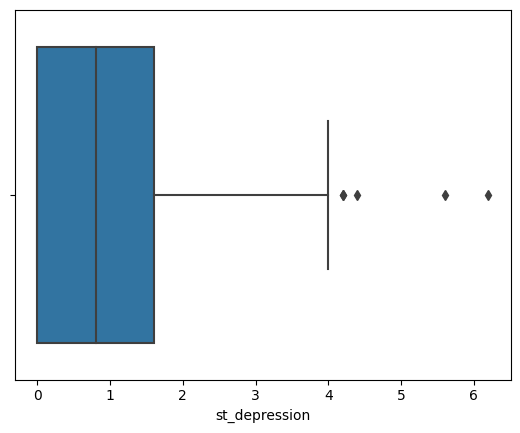

st_slope_type


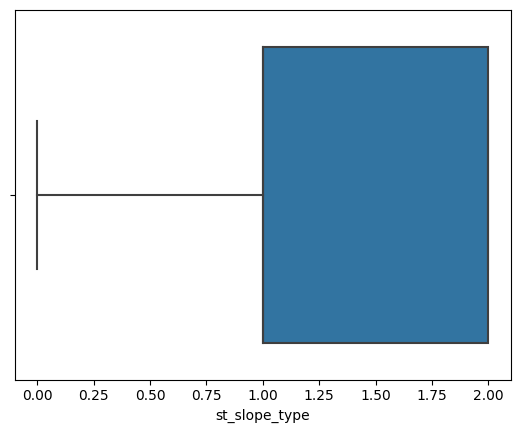

num_major_vessels


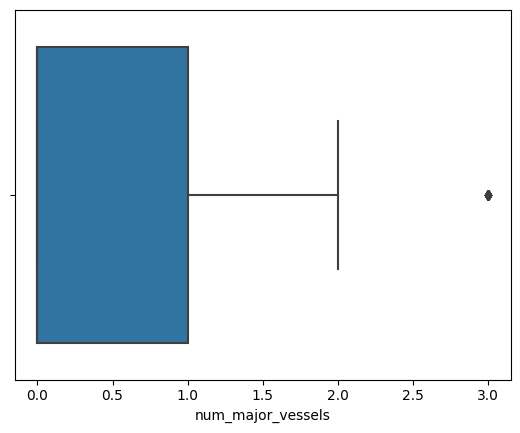

thalassemia_type


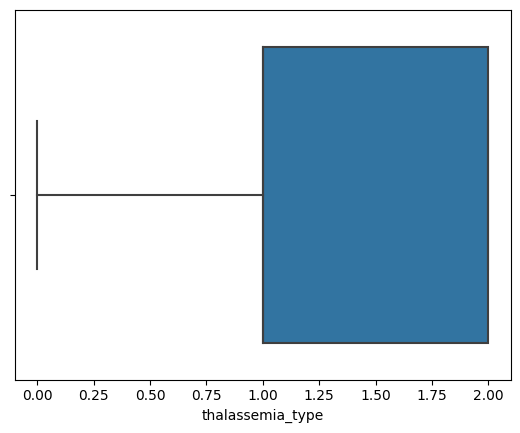

In [86]:
for i in df.iloc[0:,2:13].columns:
    sns.boxplot(x=df[i])
    print(i)
    plt.show()

# Data Splitting

Splitting the Features and Target

In [87]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [88]:
print(X)

     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
142   52    1                3                   128.0        205.0   
48    65    0                2                   140.0        417.0   
86    47    1                2                   138.0        257.0   
204   43    1                1                   110.0        211.0   
227   67    0                2                   152.0        277.0   
..   ...  ...              ...                     ...          ...   
181   56    0                1                   134.0        409.0   
191   51    1                1                   140.0        298.0   
172   59    0                1                   174.0        249.0   
114   62    0                2                   130.0        263.0   
127   54    1                1                   110.0        239.0   

    fasting_blood_sugar  resting_electrocardiographic_results  \
142                   1                                     1   
48               

In [89]:
print(Y)

142    0
48     0
86     0
204    0
227    0
      ..
181    1
191    1
172    1
114    1
127    1
Name: target, Length: 299, dtype: int64


Splitting the Data into Training data & Test Data

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [91]:
print(X.shape, X_train.shape, X_test.shape)

(299, 13) (239, 13) (60, 13)


# Model training and model evaluation

Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [93]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
# accuracy on training data
from sklearn.metrics import accuracy_score

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [95]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8410041841004184


In [96]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [97]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8166666666666667


ANN Model

In [98]:
df2=df

In [99]:
df2['exercise_induced_angina'] = df2['exercise_induced_angina'].map({1:1, 0:0})
df2['fasting_blood_sugar'] = df2['fasting_blood_sugar'].map({1: 1, 0: 0})


In [100]:
X = df2.drop(columns='target', axis=1)
Y = df2['target']

In [101]:
df2.dtypes

age                                       int64
sex                                       int64
chest_pain_type                           int64
resting_blood_pressure                  float64
cholesterol                             float64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
max_heart_rate_achieved                 float64
exercise_induced_angina                   int64
st_depression                           float64
st_slope_type                             int64
num_major_vessels                       float64
thalassemia_type                          int64
target                                    int64
dtype: object

In [102]:
df2

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
142,52,1,3,128.0,205.0,1,1,184.0,0,0.0,2,0.0,1,0
48,65,0,2,140.0,417.0,1,0,157.0,0,0.8,2,1.0,1,0
86,47,1,2,138.0,257.0,0,0,156.0,0,0.0,2,0.0,1,0
204,43,1,1,110.0,211.0,0,1,161.0,0,0.0,2,0.0,2,0
227,67,0,2,152.0,277.0,0,1,172.0,0,0.0,2,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,56,0,1,134.0,409.0,0,0,150.0,1,1.9,1,2.0,2,1
191,51,1,1,140.0,298.0,0,1,122.0,1,4.2,1,3.0,2,1
172,59,0,1,174.0,249.0,0,1,143.0,1,0.0,1,0.0,1,1
114,62,0,2,130.0,263.0,0,1,97.0,0,1.2,1,1.0,2,1


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [104]:
X_train.shape

(239, 13)

In [105]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200)


Epoch 1/200
8/8 [==============================] - 1s 60ms/step - loss: 16.6221 - accuracy: 0.5356 - val_loss: 6.9595 - val_accuracy: 0.5333
Epoch 2/200
8/8 [==============================] - 0s 16ms/step - loss: 3.2351 - accuracy: 0.5523 - val_loss: 4.6520 - val_accuracy: 0.4667
Epoch 3/200
8/8 [==============================] - 0s 16ms/step - loss: 3.5722 - accuracy: 0.4812 - val_loss: 0.9041 - val_accuracy: 0.5667
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 2.0406 - accuracy: 0.5397 - val_loss: 1.2069 - val_accuracy: 0.6000
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 1.2304 - accuracy: 0.5565 - val_loss: 1.1351 - val_accuracy: 0.5500
Epoch 6/200
8/8 [==============================] - 0s 14ms/step - loss: 0.8516 - accuracy: 0.6276 - val_loss: 0.8936 - val_accuracy: 0.5833
Epoch 7/200
8/8 [==============================] - 0s 14ms/step - loss: 0.8665 - accuracy: 0.6318 - val_loss: 0.7050 - val_accuracy: 0.6833
Epoch 8/200
8/8 [==

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4696 - accuracy: 0.8000


[0.469621479511261, 0.800000011920929]

In [ ]:
Yp = model.predict(X_test)
Yp[:10]


2/2 [==============================] - 0s 5ms/step


array([[0.63672394],
       [0.989073  ],
       [0.13723528],
       [0.27198574],
       [0.9932551 ],
       [0.42716396],
       [0.23317537],
       [0.7837549 ],
       [0.9335709 ],
       [0.12569438]], dtype=float32)

In [ ]:
Y_pred = []
for element in yp:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [ ]:
Y_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 1, 1, 0]

In [ ]:
Y_test[:10]

42     0
68     1
50     0
226    0
235    1
17     0
148    0
297    1
247    1
198    0
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



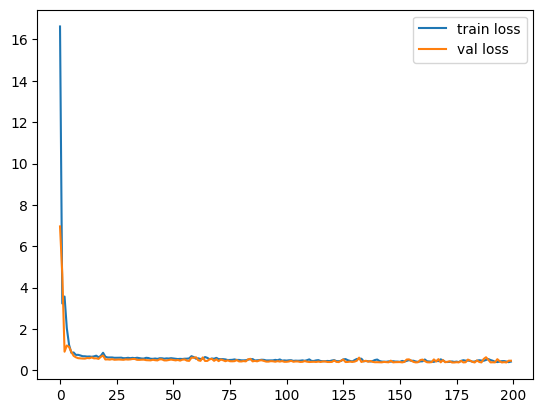

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#plot the loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

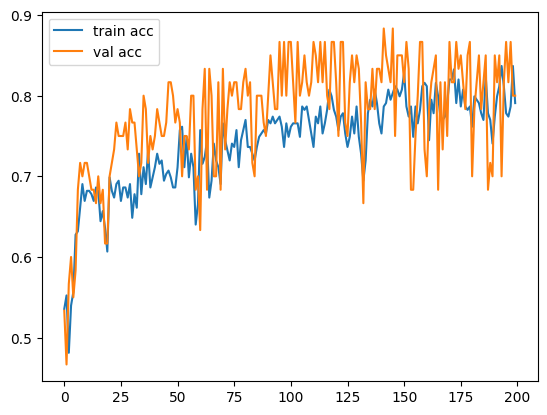

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

# Support Vector Machine model

In [106]:
df3=df

In [107]:
#Splitting the dataset
X = df3.drop(columns='target', axis=1)
Y = df3['target']

In [108]:
df3.shape

(299, 14)

In [109]:
df3.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,1.528428,131.715719,246.785953,0.143813,0.525084,149.327759,0.331104,1.058528,1.394649,0.672241,1.331104,0.464883
std,9.030264,0.46767,0.856300,17.747751,52.532582,0.351488,0.526358,23.121062,0.471399,1.162769,0.616962,0.937438,0.585681,0.499601
min,29.000000,0.00000,0.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.00000,1.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.00000,1.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.00000,2.000000,140.000000,275.500000,0.000000,1.000000,165.500000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [111]:
df3.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
142,52,1,3,128.0,205.0,1,1,184.0,0,0.0,2,0.0,1,0
48,65,0,2,140.0,417.0,1,0,157.0,0,0.8,2,1.0,1,0
86,47,1,2,138.0,257.0,0,0,156.0,0,0.0,2,0.0,1,0
204,43,1,1,110.0,211.0,0,1,161.0,0,0.0,2,0.0,2,0
227,67,0,2,152.0,277.0,0,1,172.0,0,0.0,2,1.0,1,0


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [113]:
print(X.shape, X_train.shape, X_test.shape)

(299, 13) (239, 13) (60, 13)


In [114]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [115]:
model = svm.SVC(kernel= 'linear', C = 0.01)

In [116]:
#training the support vector machine classifier
#uses both splitted data sets to train the model
model.fit(X_train, Y_train)

SVC(C=0.01, kernel='linear')

Evaluating the model

In [117]:
# calculating the accuracy score on the training data
# Predicting all the labels in the training dataset and

X_train_prediction = model.predict(X_train)

# comparing the predicted data with the original y_train data set
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [118]:
print(X_train_prediction)

[0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0]


In [119]:
Y_train_data = np.array(Y_train)
print(Y_train_data)

[0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]


In [120]:
print(training_data_accuracy)

0.8117154811715481


In [121]:
#calculating the accuracy on the test data
#predicting unknown data


X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [122]:
print(test_data_accuracy)

0.8


In [123]:
import matplotlib.pyplot as plt

In [124]:
# Display the comparison using a bar chart
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [training_data_accuracy, test_data_accuracy]

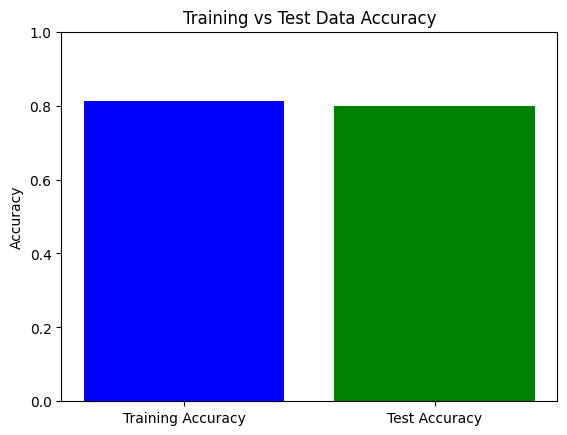

In [125]:
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training vs Test Data Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy values
plt.show()

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[27  5]
 [ 7 21]]


In [128]:
from sklearn.metrics import precision_score, recall_score

Calculate Recall and Precision

In [129]:
# Calculate precision and recall
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8076923076923077
Recall: 0.75
